**Simple Recommender based on Popularity and Rating**

In [1]:
# Importing required packages and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading movies dataset

movies_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\movies_metadata.csv')

C:\Users\v-lpilla\AppData\Local\Temp\ipykernel_22816\3401728606.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\movies_metadata.csv')


In [ ]:
# Checking for null values in the movies dataset

print(movies_df.shape)
movies_df.isnull().sum()

(45466, 24)


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
# Filtering out unrequired columns from the data

movies_df = movies_df[['id', 
                       'title', 
                       'genres', 
                       'original_language', 
                       'overview', 
                       'popularity', 
                       'revenue', 
                       'production_companies', 
                       'adult', 
                       'release_date', 
                       'runtime', 
                       'spoken_languages', 
                       'tagline',  
                       'vote_average', 
                       'vote_count']]

In [5]:
movies_df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'revenue', 'production_companies', 'adult', 'release_date', 'runtime',
       'spoken_languages', 'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies_df.popularity.describe()

count     45461
unique    44176
top         0.0
freq         34
Name: popularity, dtype: object

In [ ]:
# Removing rows that have different data type to aid data type conversion

movies_df = movies_df.loc[movies_df['popularity'] != 'Beware Of Frost Bites']

In [ ]:
# Converting column data type for further calculations

movies_df['popularity'] = movies_df['popularity'].astype('float') 

movies_df.sort_values(by = 'popularity', ascending = False)

movies_df[['title','genres','revenue','popularity']].head(100)

,title,genres,revenue,popularity
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",373554033.0,21.946943
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",262797249.0,17.015539
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,11.712900
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",81452156.0,3.859495
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",76578911.0,8.387519
...,...,...,...,...
95,La Haine,"[{'id': 18, 'name': 'Drama'}]",0.0,12.108196
96,Shopping,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0.0,2.657647
97,Heidi Fleiss: Hollywood Madam,"[{'id': 99, 'name': 'Documentary'}]",0.0,0.638211
98,City Hall,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",0.0,4.807223


5.618207215134184


(array([ 3012.,   194.,   530.,  1614.,  4538., 11329., 14643.,  7705.,
         1498.,   397.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

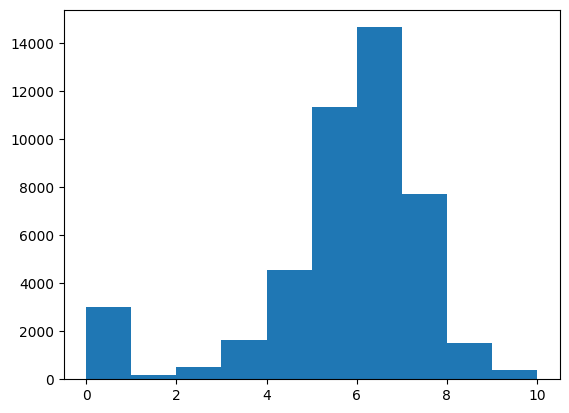

In [ ]:
# Calculating average rating based on votes

avg_rating = movies_df['vote_average'].mean()

print(avg_rating)

plt.hist( movies_df['vote_average'])

In [10]:
movies_df.isnull().sum()

id                          0
title                       5
genres                      0
original_language          11
overview                  954
popularity                  5
revenue                     5
production_companies        3
adult                       0
release_date               87
runtime                   262
spoken_languages            5
tagline                 25053
vote_average                5
vote_count                  5
dtype: int64

In [ ]:
# Calculating quantiles to fetch valid movies with vote count greater than or equal to 95% of the movies

avg_vote_count = movies_df['vote_count'].mean()
print(avg_vote_count)

min_vote_count = movies_df['vote_count'].quantile(0.95)
print(min_vote_count)


109.89733831940167
434.0


In [ ]:
# Fetching valid movies

valid_movies = movies_df.loc[movies_df['vote_count'] >= min_vote_count]
valid_movies

,id,title,genres,original_language,overview,popularity,revenue,production_companies,adult,release_date,runtime,spoken_languages,tagline,vote_average,vote_count
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",False,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",False,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0
5,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {...",False,1995-12-15,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",A Los Angeles Crime Saga,7.7,1886.0
9,710,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,James Bond must unmask the mysterious head of ...,14.686036,352194034.0,"[{'name': 'United Artists', 'id': 60}, {'name'...",False,1995-11-16,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",No limits. No fears. No substitutes.,6.6,1194.0
15,524,Casino,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,The life of the gambling paradise – Las Vegas ...,10.137389,116112375.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",False,1995-11-22,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",No one stays at the top forever.,7.8,1343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44624,406990,What Happened to Monday,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,In a world where families are limited to one c...,60.581223,0.0,"[{'name': 'Vendome Pictures', 'id': 7460}, {'n...",False,2017-08-18,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Seven sisters. One identity.,7.3,598.0
44632,341013,Atomic Blonde,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,An undercover MI6 agent is sent to Berlin duri...,14.455104,90007945.0,"[{'name': 'Denver and Delilah Productions', 'i...",False,2017-07-26,115.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",NaN,6.1,748.0
44678,374720,Dunkirk,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,The miraculous evacuation of Allied soldiers f...,30.938854,519876949.0,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Stu...",False,2017-07-19,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",The event that shaped our world,7.5,2712.0
44842,335988,Transformers: The Last Knight,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,"Autobots and Decepticons are at war, with huma...",39.186819,604942143.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",False,2017-06-21,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]","For one world to live, the other must die.",6.2,1440.0


In [ ]:
# Function to calculate rating based on IMDB formula

def weighted_rating(df, m=min_vote_count, C=avg_rating):
    v = df['vote_count']
    R = df['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Calculating the score based on IMDB formula for valid movies

valid_movies['score'] = valid_movies.apply(weighted_rating, axis = 1)
valid_movies

C:\Users\v-lpilla\AppData\Local\Temp\ipykernel_22816\4195139559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_movies['score'] = valid_movies.apply(weighted_rating, axis = 1)


,id,title,genres,original_language,overview,popularity,revenue,production_companies,adult,release_date,runtime,spoken_languages,tagline,vote_average,vote_count,score
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",False,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,7.545529
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",False,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,6.704602
5,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {...",False,1995-12-15,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",A Los Angeles Crime Saga,7.7,1886.0,7.310561
9,710,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,James Bond must unmask the mysterious head of ...,14.686036,352194034.0,"[{'name': 'United Artists', 'id': 60}, {'name'...",False,1995-11-16,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",No limits. No fears. No substitutes.,6.6,1194.0,6.338269
15,524,Casino,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,The life of the gambling paradise – Las Vegas ...,10.137389,116112375.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",False,1995-11-22,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",No one stays at the top forever.,7.8,1343.0,7.267137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44624,406990,What Happened to Monday,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,In a world where families are limited to one c...,60.581223,0.0,"[{'name': 'Vendome Pictures', 'id': 7460}, {'n...",False,2017-08-18,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Seven sisters. One identity.,7.3,598.0,6.592734
44632,341013,Atomic Blonde,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,An undercover MI6 agent is sent to Berlin duri...,14.455104,90007945.0,"[{'name': 'Denver and Delilah Productions', 'i...",False,2017-07-26,115.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",NaN,6.1,748.0,5.923098
44678,374720,Dunkirk,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,The miraculous evacuation of Allied soldiers f...,30.938854,519876949.0,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Stu...",False,2017-07-19,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",The event that shaped our world,7.5,2712.0,7.240401
44842,335988,Transformers: The Last Knight,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,"Autobots and Decepticons are at war, with huma...",39.186819,604942143.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",False,2017-06-21,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]","For one world to live, the other must die.",6.2,1440.0,6.065263


In [ ]:
# Popular movies preview

valid_movies = valid_movies.sort_values('score', ascending = False)

valid_movies[['title', 'vote_count', 'vote_average', 'score', 'popularity']].head(15)

,title,vote_count,vote_average,score,popularity
314,The Shawshank Redemption,8358.0,8.5,8.357746,51.645403
834,The Godfather,6024.0,8.5,8.306334,41.109264
12481,The Dark Knight,12269.0,8.3,8.208376,123.167259
2843,Fight Club,9678.0,8.3,8.184899,63.869599
292,Pulp Fiction,8670.0,8.3,8.172155,140.950236
351,Forrest Gump,8147.0,8.2,8.069421,48.307194
522,Schindler's List,4436.0,8.3,8.061007,41.725123
23673,Whiplash,4376.0,8.3,8.058025,64.299990
5481,Spirited Away,3968.0,8.3,8.035598,41.048867
1154,The Empire Strikes Back,5998.0,8.2,8.025793,19.470959


Text(0.5, 1.0, 'Top Rated Movies')

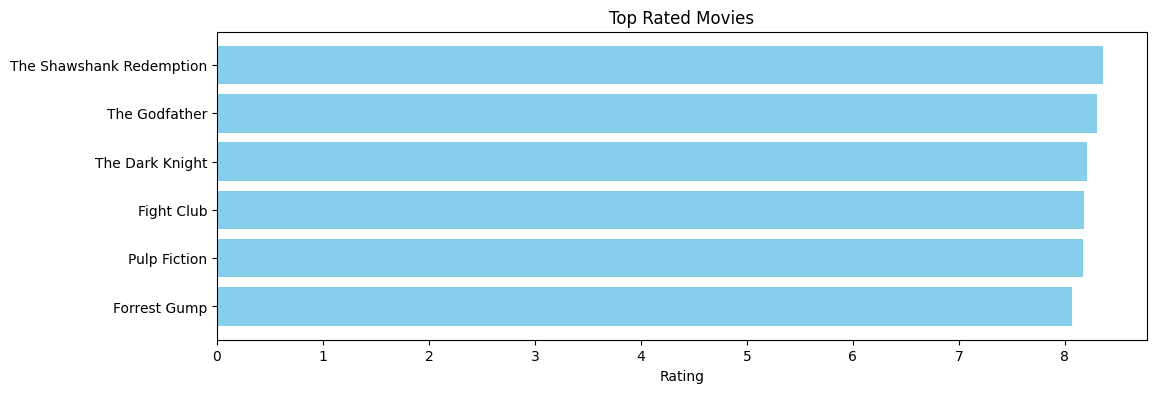

In [ ]:
# Plotting top 6 movies based on the calculated score

valid_movies['score'] = valid_movies['score'].astype('float')
pop= valid_movies.sort_values('score', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Top Rated Movies")

Text(0.5, 1.0, 'Popular Movies')

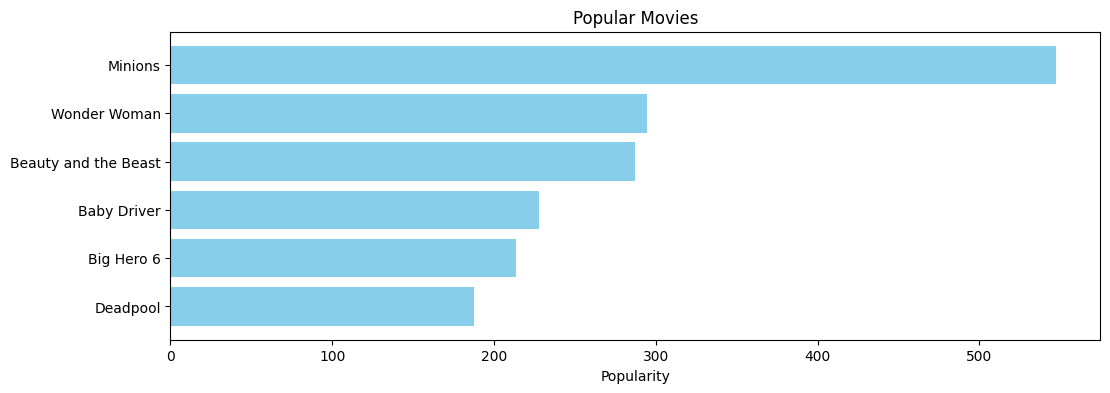

In [ ]:
# Plotting top 6 movies based on popularity

movies_df['popularity'] = movies_df['popularity'].astype('float')
pop= movies_df.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Content Based Recommender

In [ ]:
# Removing rows that have different data type to aid data type conversion

movies_df = movies_df.loc[movies_df['id'] != '1997-08-20']
movies_df = movies_df.loc[movies_df['id'] != '2012-09-29']
movies_df = movies_df.loc[movies_df['id'] != '2014-01-01']

In [ ]:
# Reading credits data and merging it with movies dataset

credits_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\credits.csv')

movies_df['id'] = movies_df['id'].astype(int)
credits_df['id'] = credits_df['id'].astype(int)

merged_df = credits_df.merge(movies_df, on = 'id')
merged_df

,cast,crew,id,title,genres,original_language,overview,popularity,revenue,production_companies,adult,release_date,runtime,spoken_languages,tagline,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",False,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",False,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.712900,0.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",False,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...,False,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,76578911.0,"[{'name': 'Sandollar Productions', 'id': 5842}...",False,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,Rising and falling between a man and woman.,0.072051,0.0,[],False,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Rising and falling between a man and woman,4.0,1.0
45534,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.178241,0.0,"[{'name': 'Sine Olivia', 'id': 19653}]",False,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",NaN,9.0,3.0
45535,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"When one of her hits goes wrong, a professiona...",0.903007,0.0,"[{'name': 'American World Pictures', 'id': 6165}]",False,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A deadly game of wits.,3.8,6.0
45536,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,Satan Triumphant,[],en,"In a small town live two brothers, one a minis...",0.003503,0.0,"[{'name': 'Yermoliev', 'id': 88753}]",False,1917-10-21,87.0,[],NaN,0.0,0.0


In [ ]:
# Handling Null values in description column

print(merged_df.columns)
merged_df['overview'].head()
merged_df['description'] = merged_df['overview'] + merged_df['tagline']
merged_df['description'] = merged_df['description'].fillna('')

Index(['cast', 'crew', 'id', 'title', 'genres', 'original_language',
       'overview', 'popularity', 'revenue', 'production_companies', 'adult',
       'release_date', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# Creating TF-IDF matrix for description column

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['description'])
tfidf_matrix.shape

(45538, 573636)

In [ ]:
# Calculating cosine similarity

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Creating index column for the df

indices = pd.Series(merged_df.index, index = merged_df['title']).drop_duplicates()

In [ ]:
# Function to get movie recommendations

def get_recommendations(title, cosine_sim = cosine_sim, indices = indices, merged_df = merged_df):
    if title not in indices:
        return f"'{title}' not found in the dataset."

    idx = indices[title]

    # Flatten to handle 2D row issue
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))

    # Sort by similarity, ignore the first item (self match)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:16]

    # Filter out-of-bounds indices
    movie_indices = [i[0] for i in sim_scores if i[0] < len(merged_df)]

    return merged_df['title'].iloc[movie_indices]

In [25]:
get_recommendations('Pulp Fiction')

32678                                Kill Your Friends
11989                                      You Kill Me
13746                       The Last House on the Left
41354        True Memoirs of an International Assassin
32606                                        Bloodwork
45495    The Fortunes and Misfortunes of Moll Flanders
26134                                  The Hatchet Man
264                                      Little Odessa
34291                     The Haunting of Whaley House
29140                              Kill Me Three Times
12292                       Wristcutters: A Love Story
15946                                     Murder, Inc.
25027                                             BFFs
39886                     Bubblegum and Broken Fingers
39447                                     Carnage Park
Name: title, dtype: object

In [26]:
get_recommendations('The Dark Knight Rises')

150                               Batman Forever
12501                            The Dark Knight
3100                Batman: Mask of the Phantasm
1331                              Batman Returns
585                                       Batman
21441            Batman: Mystery of the Batwoman
15541                 Batman: Under the Red Hood
9244          Batman Beyond: Return of the Joker
18071                           Batman: Year One
25314                          Batman vs Dracula
11772                                  Slow Burn
20269    Batman: The Dark Knight Returns, Part 2
10138                              Batman Begins
36050                          Batman: Bad Blood
19827    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

Metadata Based Recommender

In [ ]:
# Reading keywords data and merging it with movies dataset

keywords_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\keywords.csv')
keywords_df['id'] = keywords_df['id'].astype(int)

merged_df = merged_df.merge(keywords_df, on = 'id')
merged_df.columns

Index(['cast', 'crew', 'id', 'title', 'genres', 'original_language',
       'overview', 'popularity', 'revenue', 'production_companies', 'adult',
       'release_date', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'description', 'keywords'],
      dtype='object')

In [ ]:
# Function to convert stringified lists into lists

from ast import literal_eval

def safe_literal_eval(val):
    if pd.isna(val):
        return []
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []

# Converting stringified lists into lists

features = ['cast', 'crew', 'keywords', 'genres', 'production_companies']
for feature in features:
    merged_df[feature] = merged_df[feature].apply(safe_literal_eval)


In [ ]:
# Function to fetch director from the list of crew members

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Function to get the list of top 3 actors from cast

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [ ]:
# Fetching director and top 3 actors

merged_df['director'] = merged_df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres', 'production_companies']
for feature in features:
    merged_df[feature] = merged_df[feature].apply(get_list)

In [ ]:
merged_df[['title', 'cast', 'director', 'keywords', 'genres', 'adult', 'production_companies', 'original_language']].head(5)

,title,cast,director,keywords,genres,adult,production_companies,original_language
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]",False,[Pixar Animation Studios],en
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]",False,"[TriStar Pictures, Teitler Film, Interscope Co...",en
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]",False,"[Warner Bros., Lancaster Gate]",en
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",False,[Twentieth Century Fox Film Corporation],en
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,"[baby, midlife crisis, confidence]",[Comedy],False,"[Sandollar Productions, Touchstone Pictures]",en


In [ ]:
# Custom language mapping to fetch the language name from language codes

import pycountry

custom_lang_map = {
    'cn': 'Chinese',
    'xx': 'Unknown',
    'sh': 'Serbo-Croatian',
    'wo': 'Wolof',
    'bm': 'Bambara',
    'ay': 'Aymara',
    'qu': 'Quechua',
    'ab': 'Abkhazian',
    'sm': 'Samoan',
    'iu': 'Inuktitut',
    'lb': 'Luxembourgish',
    'si': 'Sinhala',
}


In [ ]:
# Function to fetch the language name from language codes

def get_language_name(code):
    if pd.isna(code):
        return "Unknown"
    code = code.lower()
    if code in custom_lang_map:
        return custom_lang_map[code]
    try:
        lang = pycountry.languages.get(alpha_2=code)
        if lang and hasattr(lang, 'name'):
            return lang.name
    except (KeyError, AttributeError, LookupError):
        pass
    return "Unknown"


In [ ]:
# Fetching language names from language codes

merged_df['language_name'] = merged_df['original_language'].apply(get_language_name)
merged_df[['title', 'cast', 'director', 'keywords', 'genres', 'production_companies', 'language_name']].head(5)

,title,cast,director,keywords,genres,production_companies,language_name
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]",[Pixar Animation Studios],English
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",English
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",English
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],English
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,"[baby, midlife crisis, confidence]",[Comedy],"[Sandollar Productions, Touchstone Pictures]",English


In [ ]:
# Fuction to convert string to lower case and clean the remove spaces

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [37]:
features = ['cast', 'keywords', 'director', 'genres', 'production_companies', 'language_name']

for feature in features:
    merged_df[feature] = merged_df[feature].apply(clean_data)

In [ ]:
# Function to merge all the relavant metadata

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['production_companies']) + ' ' + ' '.join(x['language_name'])

In [39]:
merged_df['soup'] = merged_df.apply(create_soup, axis=1)

In [40]:
merged_df['soup']

0        jealousy toy boy tomhanks timallen donrickles ...
1        boardgame disappearance basedonchildren'sbook ...
2        fishing bestfriend duringcreditsstinger walter...
3        basedonnovel interracialrelationship singlemot...
4        baby midlifecrisis confidence stevemartin dian...
                               ...                        
46623    tragiclove leilahatami kouroshtahami elhamkord...
46624    artist play pinoy angelaquino perrydizon hazel...
46625     erikaeleniak adambaldwin juliedupage markl.le...
46626     iwanmosschuchin nathalielissenko pavelpavlov ...
46627                         daisyasquith   e n g l i s h
Name: soup, Length: 46628, dtype: object

In [ ]:
# Function to tokenize the metadata soup

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(merged_df['soup'])

In [ ]:
# Calculating cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Creating index column for the df

merged_df = merged_df.reset_index()
indices = pd.Series(merged_df.index, index = merged_df['title'])

In [44]:
get_recommendations('The Dark Knight Rises', cosine_sim2, indices, merged_df)

12541                  The Dark Knight
10170                    Batman Begins
9271                            Shiner
11411                     The Prestige
21195                     Man of Steel
9834                   Amongst Friends
2436     Beyond the Poseidon Adventure
11118                 Superman Returns
7732                          Mitchell
3703                       White Sands
5433                         The Swarm
7075                      The Enforcer
43836            Lure: Teen Fight Club
40774         Batman: The Killing Joke
276                Murder in the First
Name: title, dtype: object

In [45]:
get_recommendations('Pulp Fiction', cosine_sim2, indices, merged_df)

451                  Fresh
7304     Kill Bill: Vol. 2
1659          Jackie Brown
6758     Kill Bill: Vol. 1
12392              Cleaner
22668     Reasonable Doubt
9815               Be Cool
34458                 Rege
787         A Time to Kill
10857          Freedomland
13005     Lakeview Terrace
6479              S.W.A.T.
6858         New Jack City
28299    The Hateful Eight
20              Get Shorty
Name: title, dtype: object